

**1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**2. Import Dataset**

In [13]:

df = pd.read_csv("/content/weatherAUS.csv")


print(df.head())
print(df.info())
print(df.describe())


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8

In [14]:
df.columns = df.columns.str.strip()  # remove spaces from col names
print(df.columns)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


** Exploratory Data Analysis (EDA)**

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


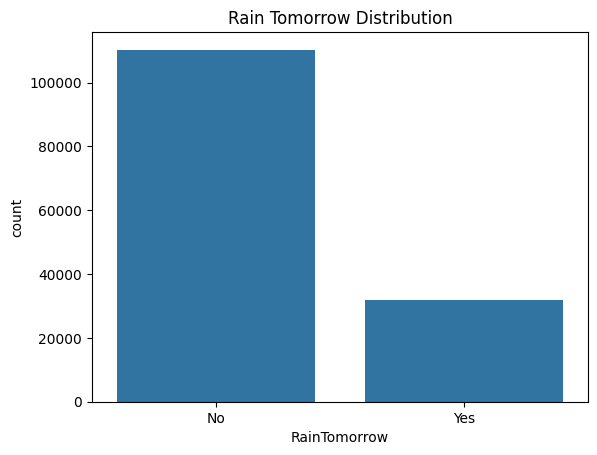

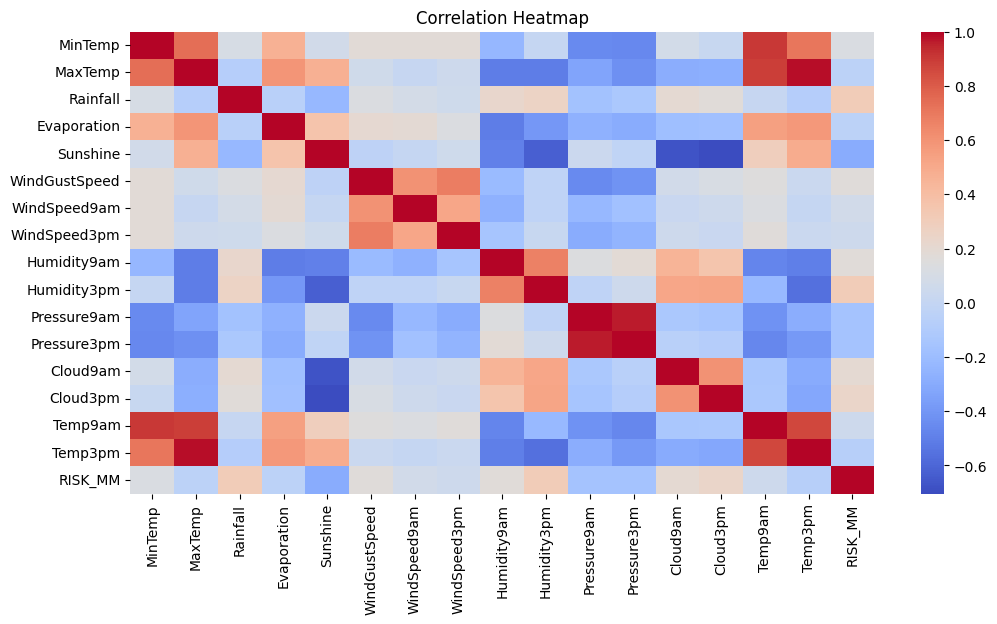

In [16]:

print(df.isnull().sum())

sns.countplot(x="RainTomorrow", data=df)
plt.title("Rain Tomorrow Distribution")
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Drop RISK_MM (Unnecessary Variable)**

In [17]:
df = df.drop("RISK_MM", axis=1)


**Handle Missing Values**

In [18]:

df = df.dropna()


** Encoding & Scaling**

In [19]:

label = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    if col != "RainTomorrow":
        df[col] = label.fit_transform(df[col].astype(str))

df["RainTomorrow"] = df["RainTomorrow"].map({"Yes": 1, "No": 0})

X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)\

y_pred = model.predict(X_test)


In [21]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.8559907834101382

Confusion Matrix:
 [[8332  467]
 [1158 1327]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      8799
           1       0.74      0.53      0.62      2485

    accuracy                           0.86     11284
   macro avg       0.81      0.74      0.77     11284
weighted avg       0.85      0.86      0.85     11284

